<a href="https://colab.research.google.com/github/KunalDM1999/Task-7-Support-Vector-Machines-SVM-/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**
**importing all imports**  

In [11]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings("ignore")


# Scikit-learn modules

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    roc_auc_score,
    ConfusionMatrixDisplay
)


**data Loading**

In [12]:
data = pd.read_csv("/content/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [14]:
print(data['Surname'].value_counts())
print(data['Geography'].value_counts())
print(data['Gender'].value_counts())

Surname
Smith        32
Martin       29
Walker       29
Scott        29
Brown        26
             ..
Hull          1
Sturdee       1
Flannagan     1
Dwyer         1
Corby         1
Name: count, Length: 2932, dtype: int64
Geography
France     5014
Germany    2510
Spain      2477
Name: count, dtype: int64
Gender
Male      5458
Female    4544
Name: count, dtype: int64


**Encoding:**

1. Gender: Binary Encoding

2.  Geography: Frequency Encoding

In [15]:
# 1. Drop rows with missing values
data.dropna(inplace=True)

# 2. Drop unneeded columns
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# 3. Binary encode Gender
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# 4. Frequency encode Geography
geo_freq = data['Geography'].value_counts(normalize=True)
data['Geography'] = data['Geography'].map(geo_freq)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.50130,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,0.24765,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0.50130,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0.50130,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,0.24765,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,0.50130,0,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,0.25105,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,0.25105,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,0.50130,0,28.0,4,130142.79,1,1.0,0.0,38190.78,0


**distribution plots and boxplots**

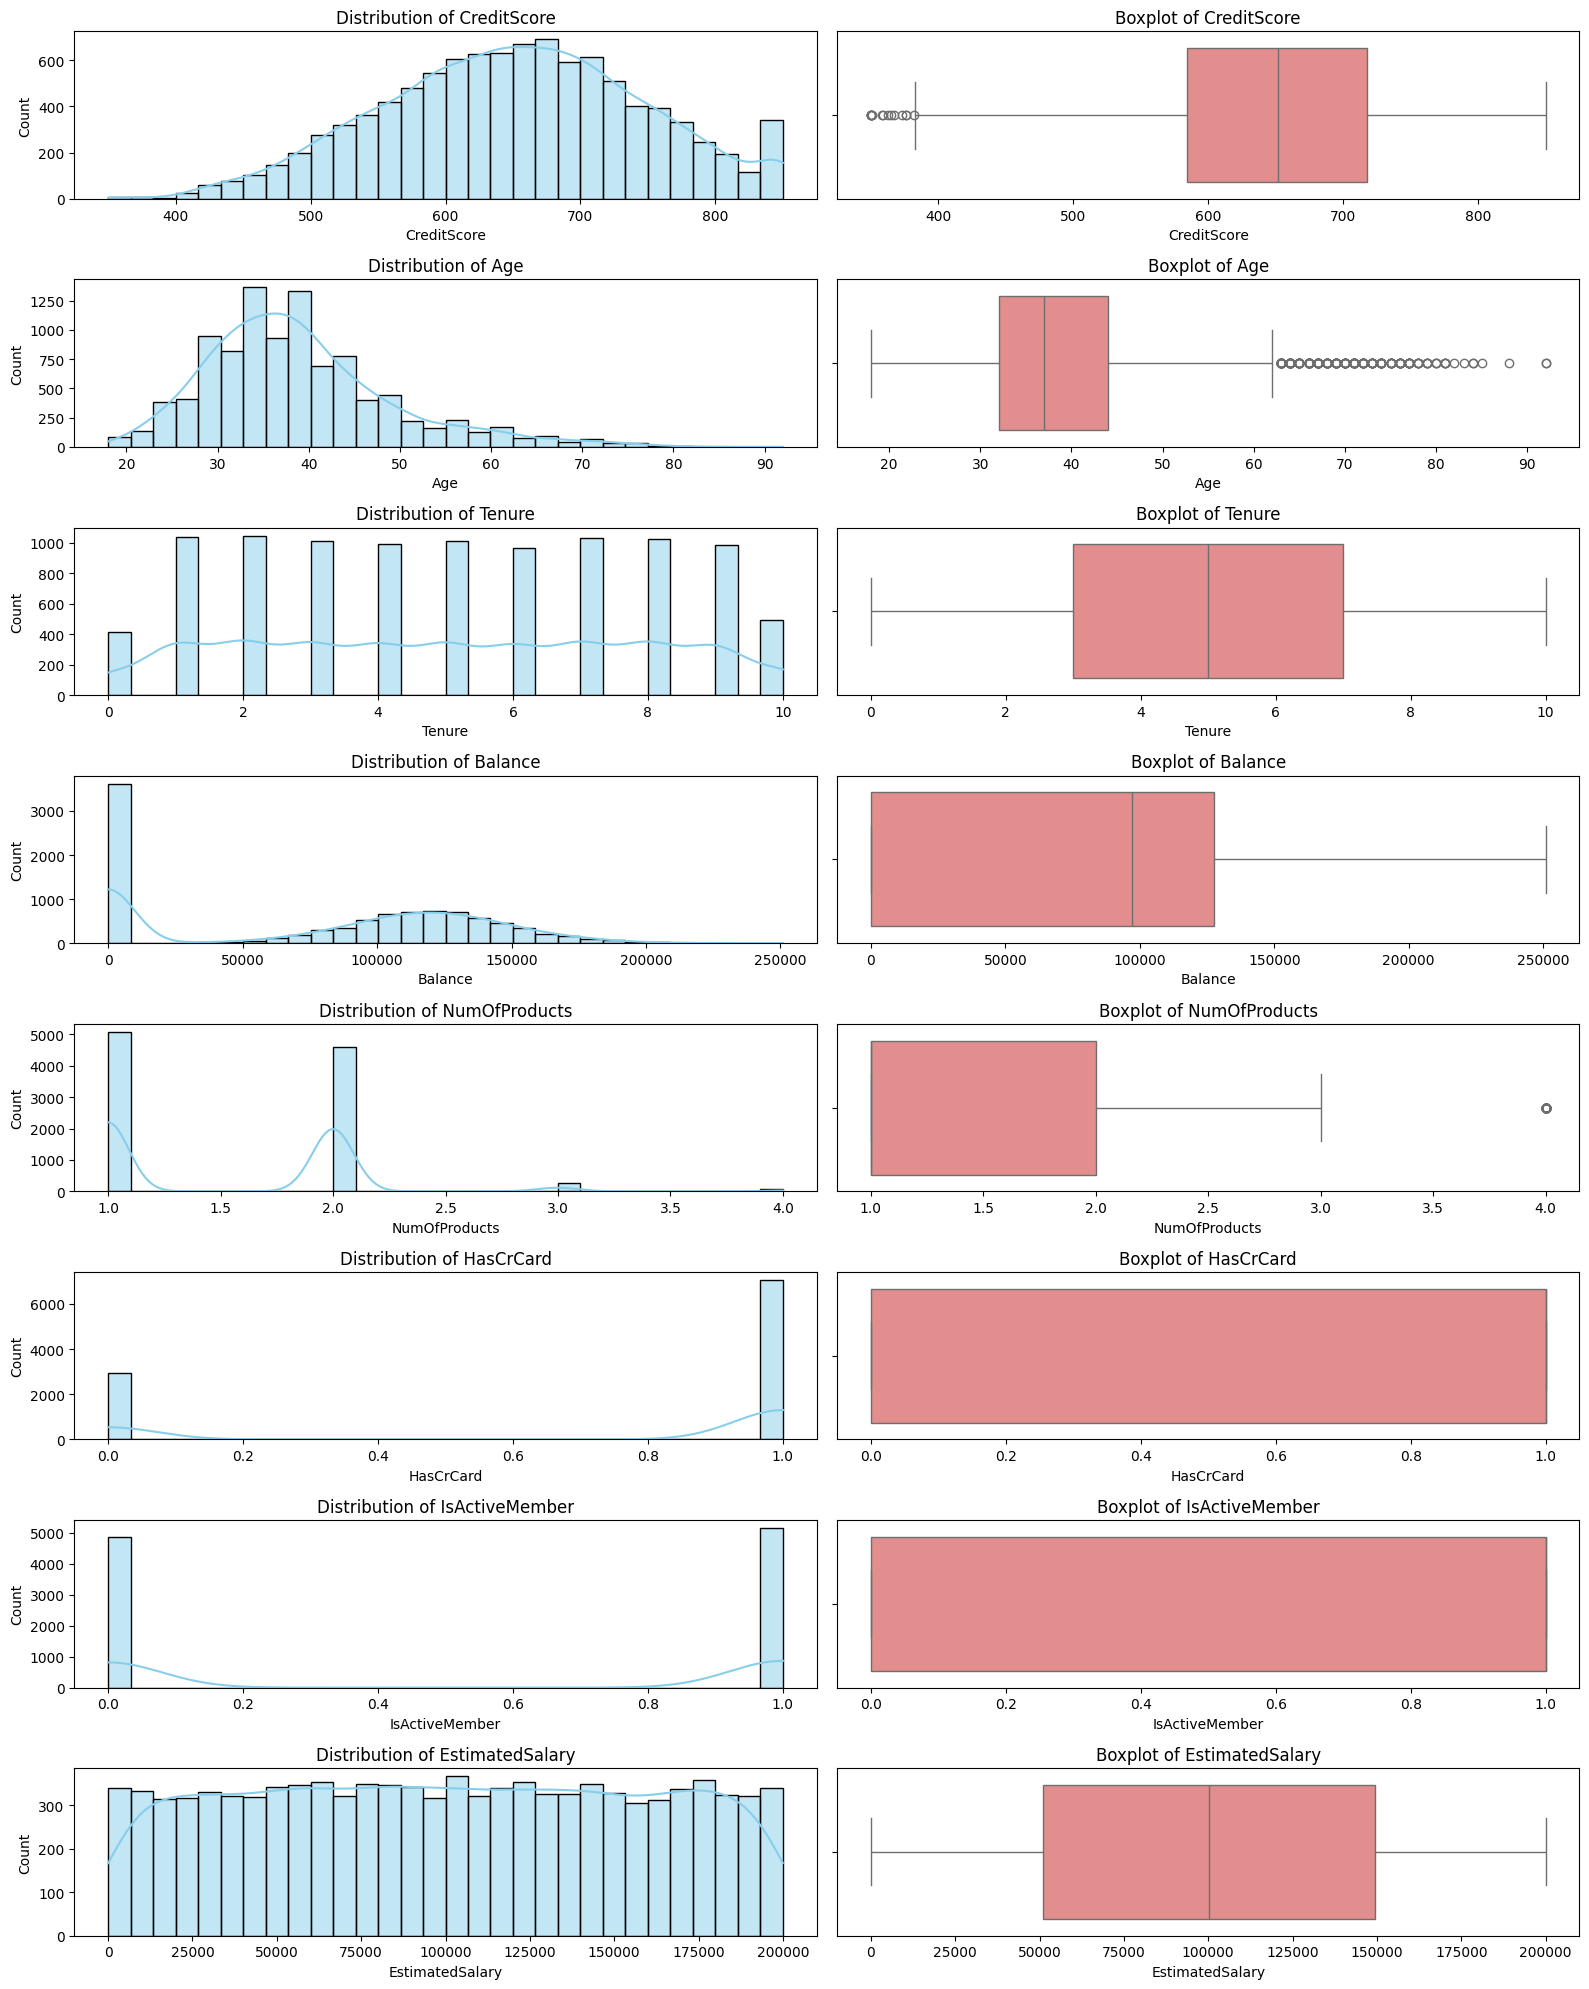

In [16]:
# List of remaining numerical features
numerical_features = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]

# Set up the plot grid
plt.figure(figsize=(16, 20))

# Plot distribution plots and boxplots side by side
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 2, 2*i + 1)
    sns.histplot(data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')

    plt.subplot(len(numerical_features), 2, 2*i + 2)
    sns.boxplot(x=data[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


**Scaling:**
1. log transform
2. Used StandardScaler to normalize features

In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Apply log-transform to Age and Balance
data['Age_log'] = np.log1p(data['Age'])
data['Balance_log'] = np.log1p(data['Balance'])

# Drop original Age and Balance
data.drop(columns=['Age', 'Balance'], inplace=True)

# Define the list of features to scale
to_scale = ['CreditScore', 'Age_log', 'Balance_log', 'Tenure', 'EstimatedSalary']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
data[to_scale] = scaler.fit_transform(data[to_scale])
data

,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_log,Balance_log
0,-0.326298,0.50130,0,-1.041838,1,1.0,1.0,0.021720,1,0.423377,-1.327437
1,-0.440137,0.24765,0,-1.387619,1,0.0,1.0,0.216366,0,0.329868,0.694745
2,-1.537125,0.50130,0,1.032846,3,1.0,0.0,0.240519,1,0.423377,0.809715
3,0.501618,0.50130,0,-1.387619,2,0.0,0.0,-0.109083,0,0.135978,-1.327437
5,-0.057226,0.24765,1,1.032846,2,1.0,0.0,0.863478,1,0.604043,0.749245
...,...,...,...,...,...,...,...,...,...,...,...
9997,0.605107,0.50130,0,0.687065,1,0.0,1.0,-1.008801,1,-0.173838,-1.327437
9998,1.257091,0.25105,1,-0.696057,2,1.0,0.0,-0.125396,1,0.423377,0.675117
9999,1.257091,0.25105,1,-0.696057,2,1.0,0.0,-0.125396,1,0.423377,0.675117
10000,1.464070,0.50130,0,-0.350277,1,1.0,0.0,-1.076527,0,-1.141982,0.773251


# **Train test spliting**

In [18]:
# 1. Separate features and target
X = data.drop(columns=['Exited'])
y = data['Exited']
# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# **Initial Modeling:**
1. **Trained SVM with both linear and rbf kernels. Linear SVM failed to detect minority class (churners).**
2. **Applied class_weight='balanced' in SVM to improve recall and F1-score for churners**.

In [23]:
# Linear Kernel
svm_linear = SVC(kernel='linear',class_weight='balanced', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# RBF Kernel
svm_rbf = SVC(kernel='rbf',class_weight='balanced', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("Linear Kernel SVM:\n")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

print("\nRBF Kernel SVM:\n")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


Linear Kernel SVM:

[[1650  738]
 [ 162  450]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      2388
           1       0.38      0.74      0.50       612

    accuracy                           0.70      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.80      0.70      0.73      3000


RBF Kernel SVM:

[[1836  552]
 [ 146  466]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      2388
           1       0.46      0.76      0.57       612

    accuracy                           0.77      3000
   macro avg       0.69      0.77      0.71      3000
weighted avg       0.83      0.77      0.79      3000



# **Hyperparameter Tuning:**
**Used GridSearchCV to tune C and gamma with cross-validation for best model selection.**



In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define parameter grid for C and gamma
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf','linear']
}

# Initialize SVM
svm = SVC(random_state=42)

# Setup GridSearchCV with 2-fold cross-validation
grid = GridSearchCV(svm, param_grid, refit=True, cv=2, verbose=2, n_jobs=-1)

# Fit GridSearch to training data
grid.fit(X_train, y_train)

# Best parameters found
print("Best parameters found:", grid.best_params_)

# Predict using best estimator on test data
y_pred = grid.best_estimator_.predict(X_test)

# Evaluation report on test data
print(classification_report(y_test, y_pred))


Fitting 2 folds for each of 32 candidates, totalling 64 fits
Best parameters found: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2388
           1       0.85      0.36      0.51       612

    accuracy                           0.86      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.86      0.86      0.83      3000



# **Dimensionality Reduction & Visualization:**
**Applied PCA (n_components=2) to visualize decision boundaries before and after tuning**.

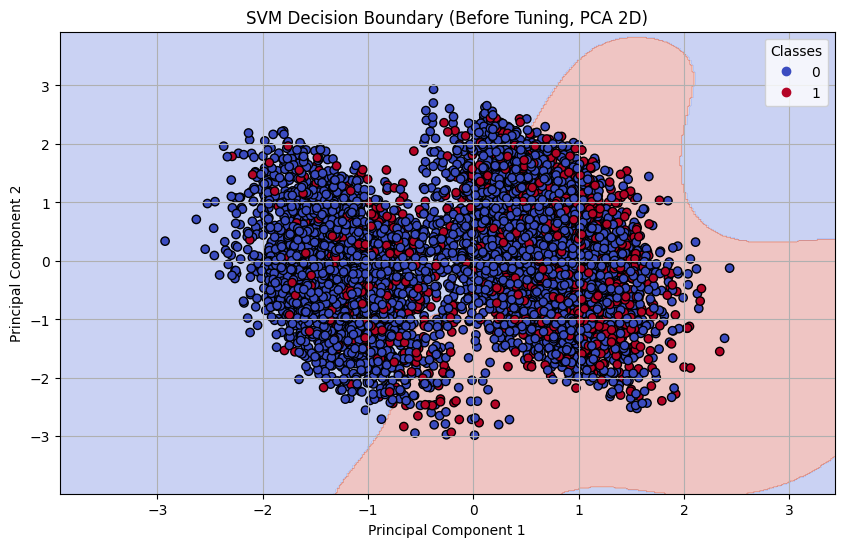

In [24]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Reduce training data to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train an initial RBF SVM (no tuning)
svm_initial = SVC(kernel='rbf',class_weight='balanced', random_state=42)
svm_initial.fit(X_train_2d, y_train)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.show()

# Plot decision boundary of initial SVM
plot_decision_boundary(svm_initial, X_train_2d, y_train, "SVM Decision Boundary (Before Tuning, PCA 2D)")


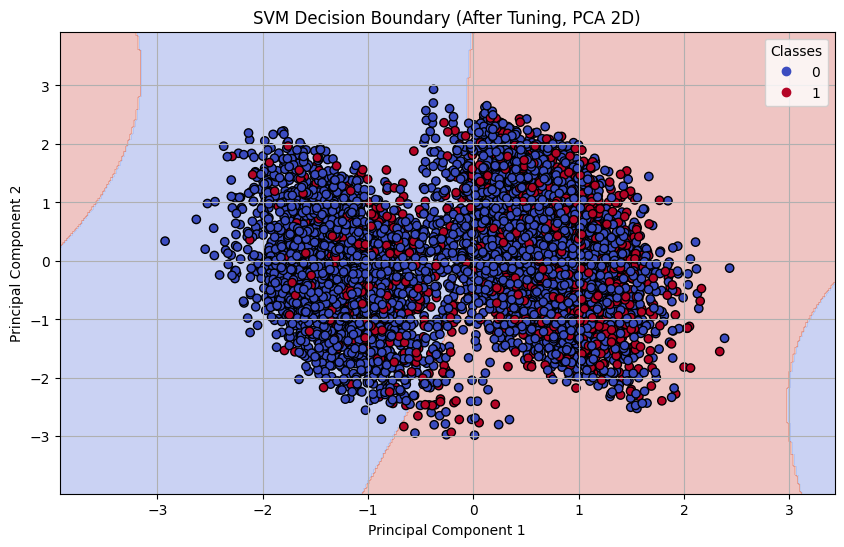

In [25]:
# Reuse PCA-transformed X_train_2d from above

# Train best model on 2D data
svm_tuned = SVC(**grid.best_params_,class_weight='balanced', random_state=42)
svm_tuned.fit(X_train_2d, y_train)

# Plot decision boundary for tuned SVM
plot_decision_boundary(svm_tuned, X_train_2d, y_train, "SVM Decision Boundary (After Tuning, PCA 2D)")


# **Interpretation**
1. Before tuning: High recall (0.76) for class 1 (churners), but low precision (0.46) and lower overall accuracy (77%) — model detected churners well but with many false positives.

2. After tuning: Accuracy improved to 86% with higher precision (0.85) for churners, but recall dropped to 0.36 — the model became more conservative, reducing false positives but missing more actual churners